In [1]:
import os
import numpy as np
import re
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from DataNamesReference import *
from UtilityFuncs import getNonEmptyLines



def getLineWordLengths(filePath):
    lineTokenCounts = []

    dataLines = getNonEmptyLines(filePath)
    for dataLine in dataLines:
        numTokens = len(dataLine.split())
        lineTokenCounts.append(numTokens)

    return lineTokenCounts

def analyzeWordLengths(wordLengths):
    avgWordLen = np.mean(wordLengths)
    topHalfDeciles = np.quantile(wordLengths, [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 1])
    print("average word length= ", avgWordLen)
    print("50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:\n", topHalfDeciles)



In [2]:

titleWordLengths = getLineWordLengths(TITLES_SUMMARY_FILE_PATH)
locationWordLengths = getLineWordLengths(LOCATIONS_SUMMARY_FILE_PATH)
departmentWordLengths = getLineWordLengths(DEPARTMENTS_SUMMARY_FILE_PATH)
companyProfileWordLengths = getLineWordLengths(COMPANY_PROFILES_SUMMARY_FILE_PATH)
descriptionWordLengths = getLineWordLengths(DESCRIPTIONS_SUMMARY_FILE_PATH)
requirementsWordLengths = getLineWordLengths(REQUIREMENTS_SUMMARY_FILE_PATH)
benefitWordLengths = getLineWordLengths(BENEFITS_SUMMARY_FILE_PATH)

print("title word lengths:")
analyzeWordLengths(titleWordLengths)
print("location word lengths:")
analyzeWordLengths(locationWordLengths)
print("department word lengths:")
analyzeWordLengths(departmentWordLengths)
print("company profile word lengths:")
analyzeWordLengths(companyProfileWordLengths)
print("description word lengths:")
analyzeWordLengths(descriptionWordLengths)
print("requirements word lengths:")
analyzeWordLengths(requirementsWordLengths)
print("benefits word lengths:")
analyzeWordLengths(benefitWordLengths)


title word lengths:
average word length=  3.728187919463087
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 3.  4.  4.  5.  6.  8. 10. 19.]
location word lengths:
average word length=  3.0627352572145545
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 3.  3.  3.  4.  4.  4.  5. 22.]
department word lengths:
average word length=  1.3977865612648221
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 1.  1.  2.  2.  2.  3.  3. 39.]
company profile word lengths:
average word length=  71.4923140269009
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 65.  71.  83. 107. 134. 169. 225. 560.]
description word lengths:
average word length=  114.59829968119023
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [  96.   116.   136.   168.4  219.   270.   337.  1461. ]
requirements word lengths:
average word length=  68.64664031620553
50th, 60th, 70t

In [3]:
def countTermsUnderXFreq(termFreqs, cutoff):
    numTermsUnderX = len([freqVal for freqVal  in termFreqs if freqVal < cutoff ])
    print("%d distinct terms under %d" % (numTermsUnderX, cutoff))
    return numTermsUnderX

def analyzeTermFrequencies(docsFilePath):
    docs = getNonEmptyLines(docsFilePath)
    docsTokenizer = keras.preprocessing.text.Tokenizer()
    docsTokenizer.fit_on_texts(docs)
    docsTermFrequencies = docsTokenizer.word_counts
    numTerms = len(docsTermFrequencies)
    print("%d distinct terms" % numTerms)
    docsFrequencyNums = docsTermFrequencies.values()

    plt.hist(docsFrequencyNums, bins=30)
    termsUnder100 = countTermsUnderXFreq(docsFrequencyNums, 100)
    termsUnder50 = countTermsUnderXFreq(docsFrequencyNums, 50)
    termsUnder25 = countTermsUnderXFreq(docsFrequencyNums, 25)
    termsUnder10 = countTermsUnderXFreq(docsFrequencyNums, 10)
    termsUnder5 = countTermsUnderXFreq(docsFrequencyNums, 5)
    termsUnder3 = countTermsUnderXFreq(docsFrequencyNums, 3)
    termsUnder2 = countTermsUnderXFreq(docsFrequencyNums, 2)

    print("vocab size for everything used 50 or more times: ", numTerms - termsUnder50)
    print("vocab size for everything used 25 or more times: ", numTerms - termsUnder25)
    print("vocab size for everything used 10 or more times: ", numTerms - termsUnder10)
    print("vocab size for everything used 5 or more times: ", numTerms - termsUnder5)
    print("vocab size for everything used 3 or more times: ", numTerms - termsUnder3)
    print("vocab size for everything used 2 or more times: ", numTerms - termsUnder2)

for title term frequencies:
4708 distinct terms
4585 distinct terms under 100
4486 distinct terms under 50
4316 distinct terms under 25
3933 distinct terms under 10
3434 distinct terms under 5
2798 distinct terms under 3
2126 distinct terms under 2
vocab size for everything used 50 or more times:  222
vocab size for everything used 25 or more times:  392
vocab size for everything used 10 or more times:  775
vocab size for everything used 5 or more times:  1274
vocab size for everything used 3 or more times:  1910
vocab size for everything used 2 or more times:  2582


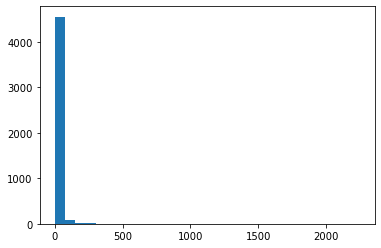

In [4]:
print("for title term frequencies:")
analyzeTermFrequencies(TITLES_SUMMARY_FILE_PATH)

for location term frequencies:
2335 distinct terms
2265 distinct terms under 100
2207 distinct terms under 50
2088 distinct terms under 25
1862 distinct terms under 10
1536 distinct terms under 5
1216 distinct terms under 3
802 distinct terms under 2
vocab size for everything used 50 or more times:  128
vocab size for everything used 25 or more times:  247
vocab size for everything used 10 or more times:  473
vocab size for everything used 5 or more times:  799
vocab size for everything used 3 or more times:  1119
vocab size for everything used 2 or more times:  1533


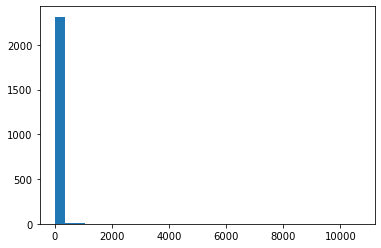

In [5]:
print("for location term frequencies:")
analyzeTermFrequencies(LOCATIONS_SUMMARY_FILE_PATH)

for department term frequencies:
1060 distinct terms
1042 distinct terms under 100
1032 distinct terms under 50
1002 distinct terms under 25
938 distinct terms under 10
833 distinct terms under 5
695 distinct terms under 3
528 distinct terms under 2
vocab size for everything used 50 or more times:  28
vocab size for everything used 25 or more times:  58
vocab size for everything used 10 or more times:  122
vocab size for everything used 5 or more times:  227
vocab size for everything used 3 or more times:  365
vocab size for everything used 2 or more times:  532


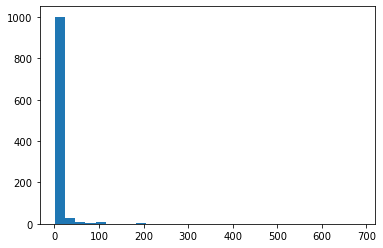

In [6]:
print("for department term frequencies:")
analyzeTermFrequencies(DEPARTMENTS_SUMMARY_FILE_PATH)

for company profile term frequencies:
13527 distinct terms
11684 distinct terms under 100
10547 distinct terms under 50
8996 distinct terms under 25
6448 distinct terms under 10
4462 distinct terms under 5
3004 distinct terms under 3
1861 distinct terms under 2
vocab size for everything used 50 or more times:  2980
vocab size for everything used 25 or more times:  4531
vocab size for everything used 10 or more times:  7079
vocab size for everything used 5 or more times:  9065
vocab size for everything used 3 or more times:  10523
vocab size for everything used 2 or more times:  11666


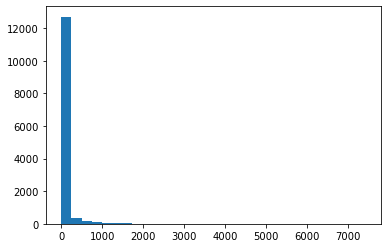

In [7]:
print("for company profile term frequencies:")
analyzeTermFrequencies(COMPANY_PROFILES_SUMMARY_FILE_PATH)

for description term frequencies:
33470 distinct terms
30643 distinct terms under 100
29148 distinct terms under 50
27262 distinct terms under 25
23589 distinct terms under 10
20047 distinct terms under 5
16412 distinct terms under 3
12222 distinct terms under 2
vocab size for everything used 50 or more times:  4322
vocab size for everything used 25 or more times:  6208
vocab size for everything used 10 or more times:  9881
vocab size for everything used 5 or more times:  13423
vocab size for everything used 3 or more times:  17058
vocab size for everything used 2 or more times:  21248


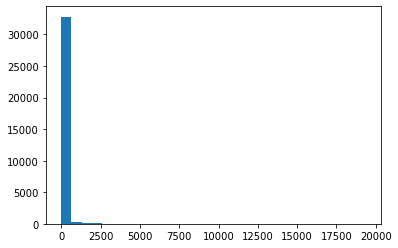

In [8]:
print("for description term frequencies:")
analyzeTermFrequencies(DESCRIPTIONS_SUMMARY_FILE_PATH)

for requirements term frequencies:
25259 distinct terms
23686 distinct terms under 100
22787 distinct terms under 50
21589 distinct terms under 25
19218 distinct terms under 10
16561 distinct terms under 5
13799 distinct terms under 3
10456 distinct terms under 2
vocab size for everything used 50 or more times:  2472
vocab size for everything used 25 or more times:  3670
vocab size for everything used 10 or more times:  6041
vocab size for everything used 5 or more times:  8698
vocab size for everything used 3 or more times:  11460
vocab size for everything used 2 or more times:  14803


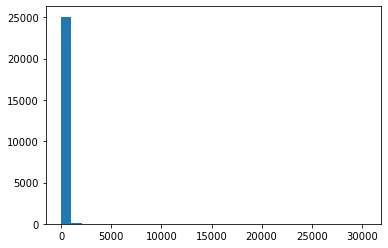

In [9]:
print("for requirements term frequencies:")
analyzeTermFrequencies(REQUIREMENTS_SUMMARY_FILE_PATH)

for benefits term frequencies:
11717 distinct terms
10989 distinct terms under 100
10476 distinct terms under 50
9697 distinct terms under 25
8155 distinct terms under 10
6599 distinct terms under 5
5240 distinct terms under 3
3703 distinct terms under 2
vocab size for everything used 50 or more times:  1241
vocab size for everything used 25 or more times:  2020
vocab size for everything used 10 or more times:  3562
vocab size for everything used 5 or more times:  5118
vocab size for everything used 3 or more times:  6477
vocab size for everything used 2 or more times:  8014


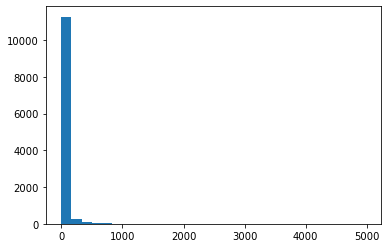

In [10]:
print("for benefits term frequencies:")
analyzeTermFrequencies(BENEFITS_SUMMARY_FILE_PATH)